# Results

We want to display how the models perform after training. We will report the mse on an unseen test dataset and compare with the training mse. We will also plot a chart with the model outputs and the target side by side, to visually inspect the prediction quality.

In [1]:
import sys
sys.path
sys.path.append('/home/enea/PycharmProjects/')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
from gizathon_project.src.data_preprocessing.data_plotting import plot_prediction_lstm, plot_prediction_fc, plot_prediction_rf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Results from FC network

MSE on training data 474.23059251796866
MSE from test data 1023.5934809323084
10 days training samples


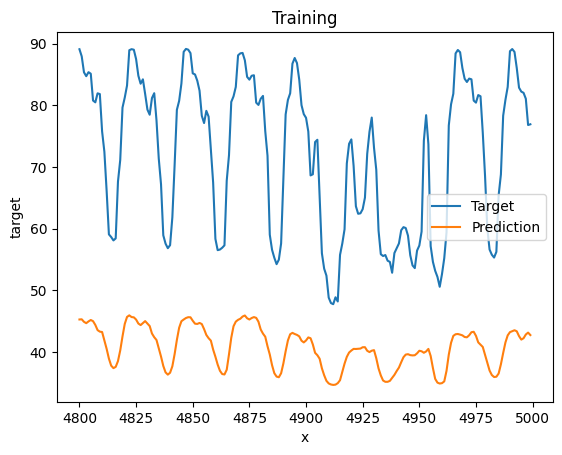

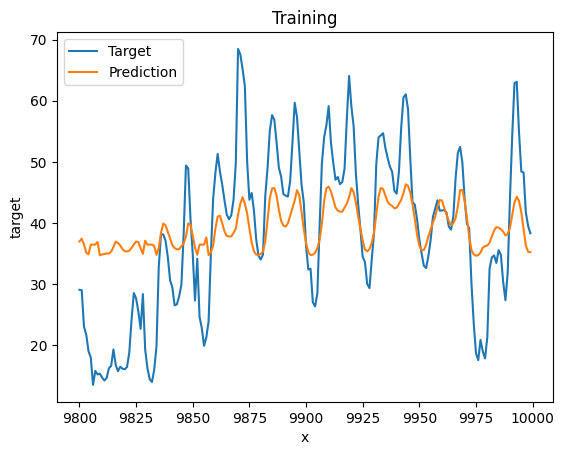

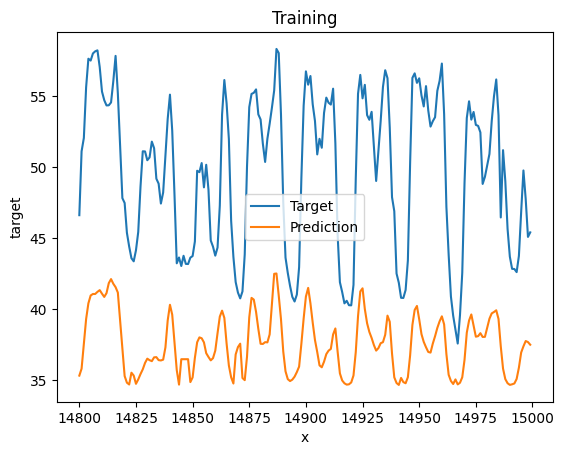

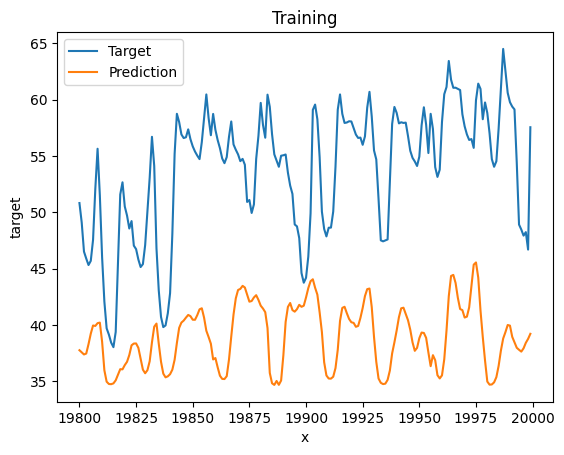

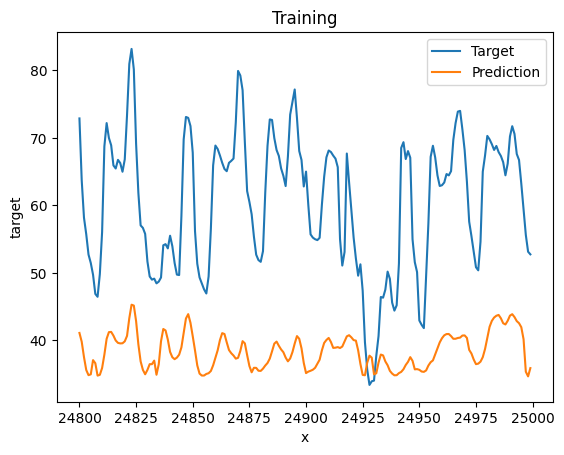

10 days testing samples


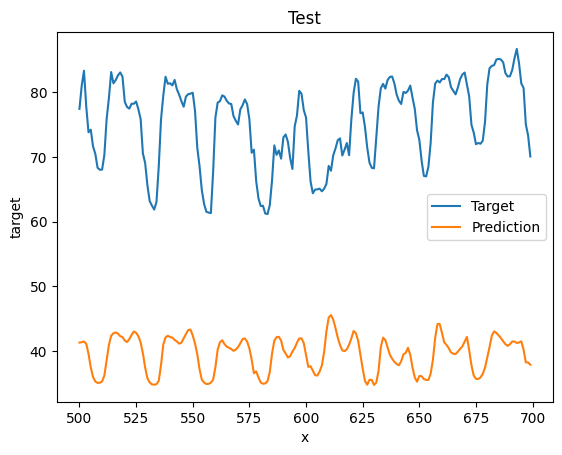

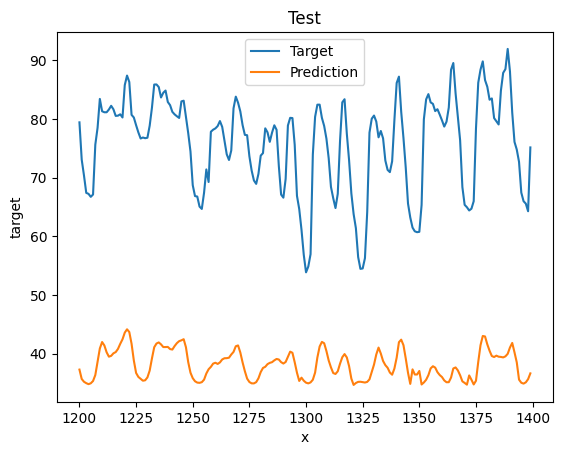

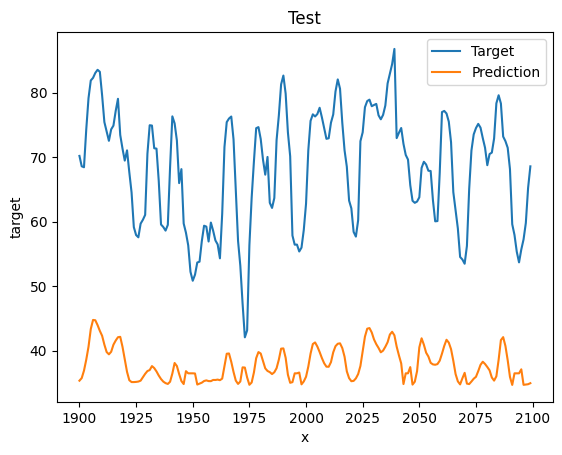

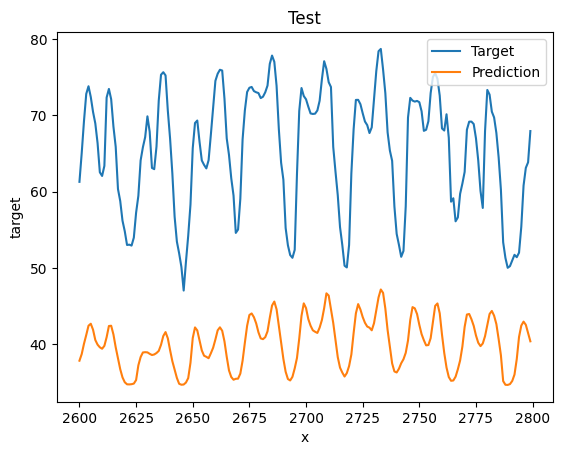

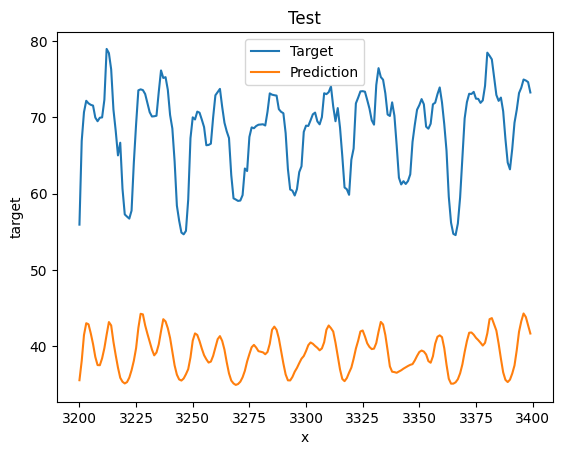

In [2]:
plot_prediction_fc()

We can see that the fully connected network is quite terribe for this task (even on the training set). Some more feature engineer could have helped, as the random forest model has a different pre-processing pipeline and performs decently. We experimented with deeper networks, but we found that eventually the network converges to a constant ouptu. It is clear from the plots above that, had the training continued, this network would have also converged to a constant value. Given the features and the target, this architecture is not really able to capture any meaningful between the two.  
We choose this model because it is currently possible to transpile it.

## Results from Random Forest

MSE on training data 34.64099455830952
MSE from test data 33.166831411059086
10 days training samples


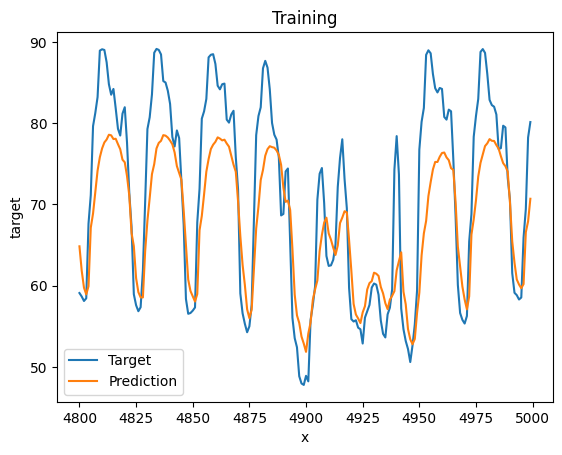

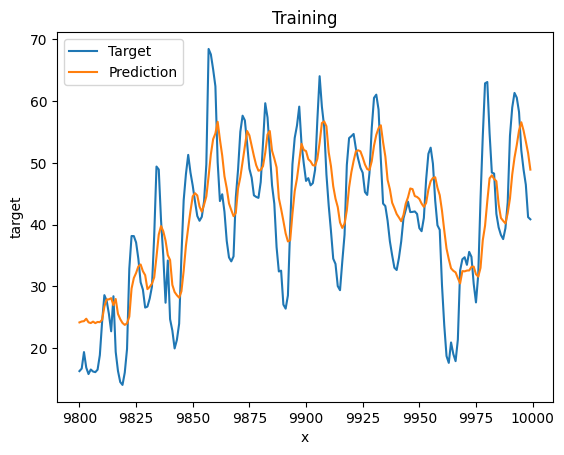

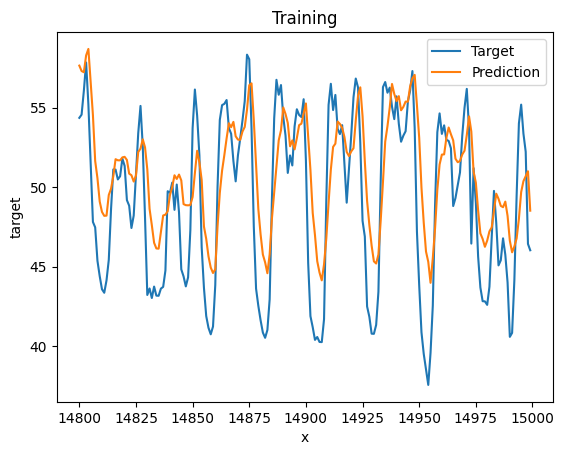

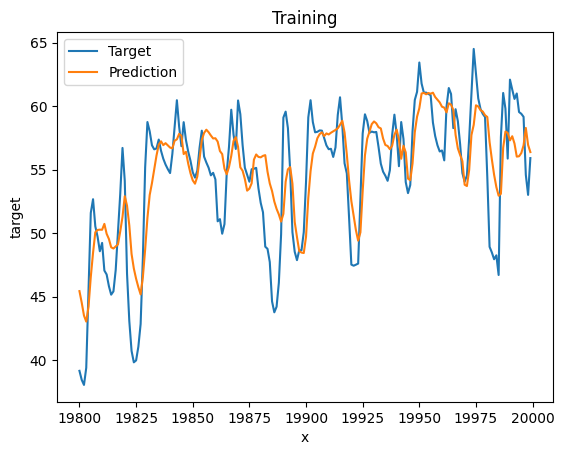

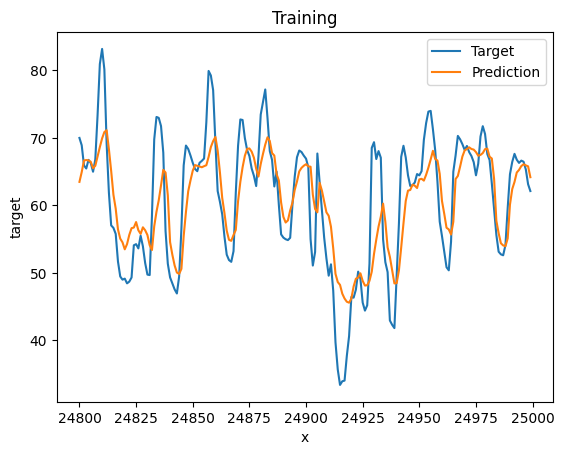

10 days testing samples


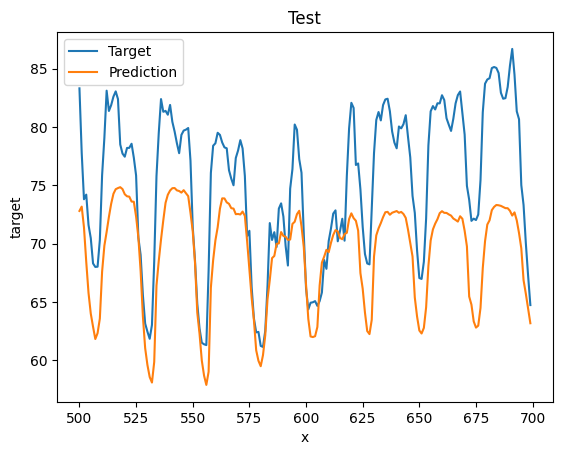

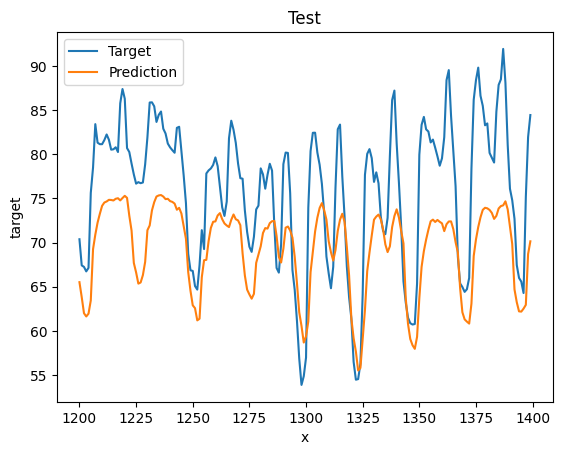

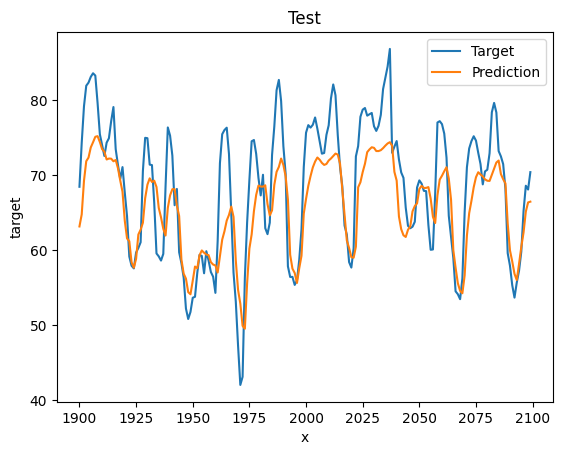

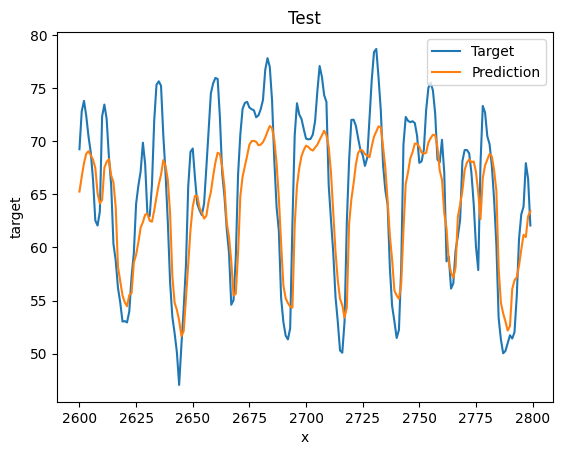

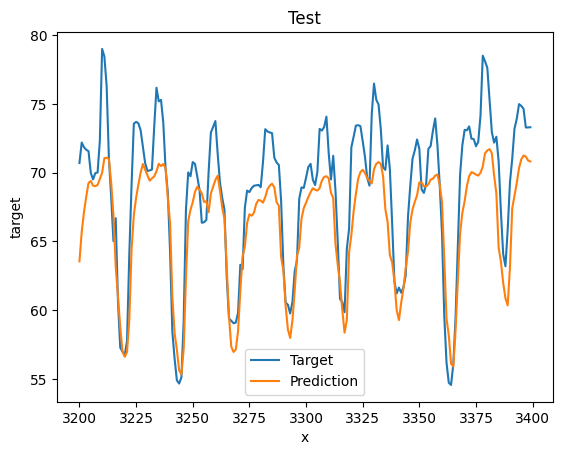

In [3]:
plot_prediction_rf()

We see that the random forest does a better job than the fully connected network in capturing some aspects of the data. The MSE loss is lower than the fully connected network, and visually the prediction quality looks better. Since random forests have no concept of time, and do not do any feature mixing (as opposed to neural networks), we replace the original features with rolling features. The details can be found in the training pipeline. We choose this model because ensables generally work well and we did not find a way to generate an onnx file for XGBoost.

## Results from LSTM

MSE on training data 19.571922118094413
MSE from test data 22.900073805359078
10 days training samples


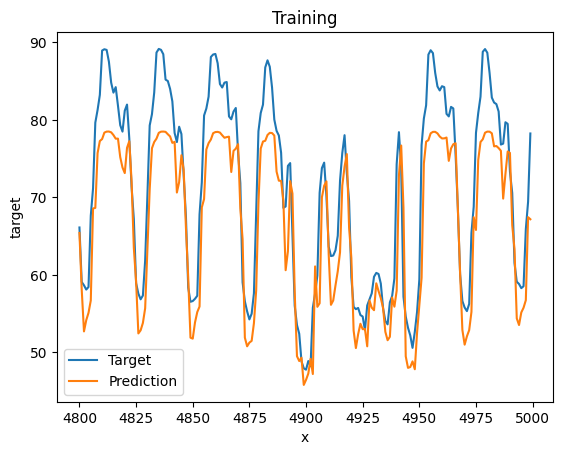

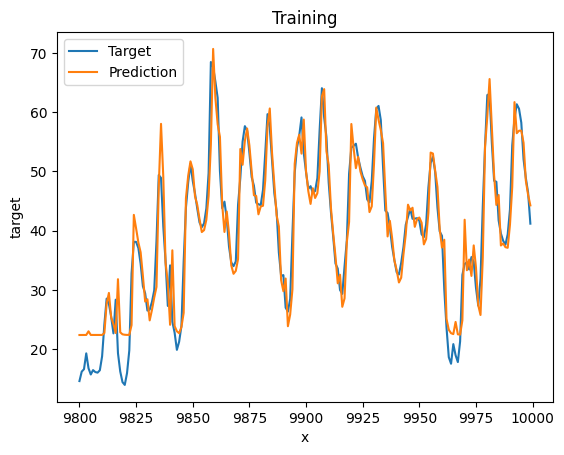

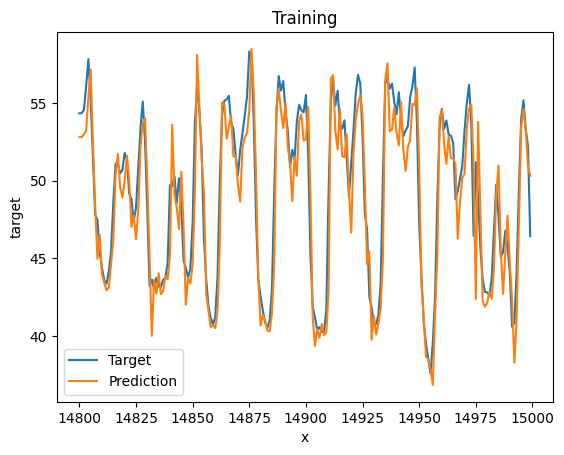

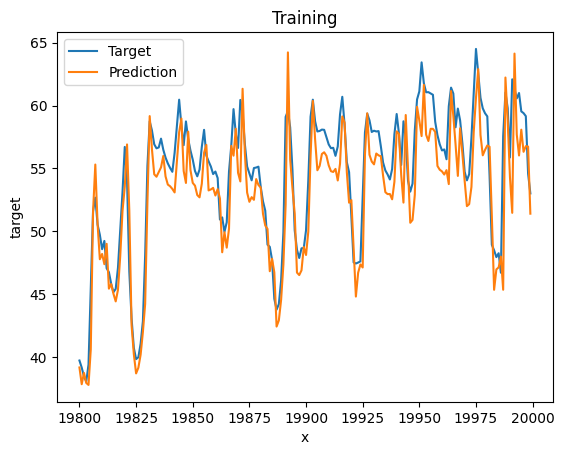

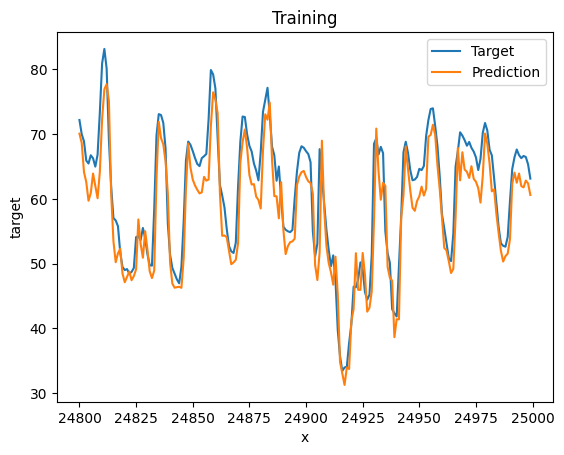

10 days testing samples


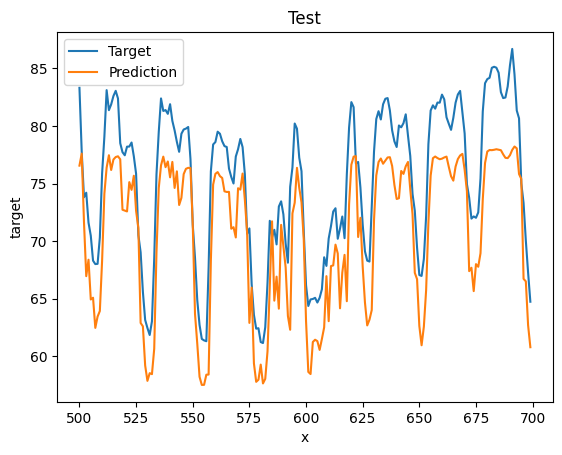

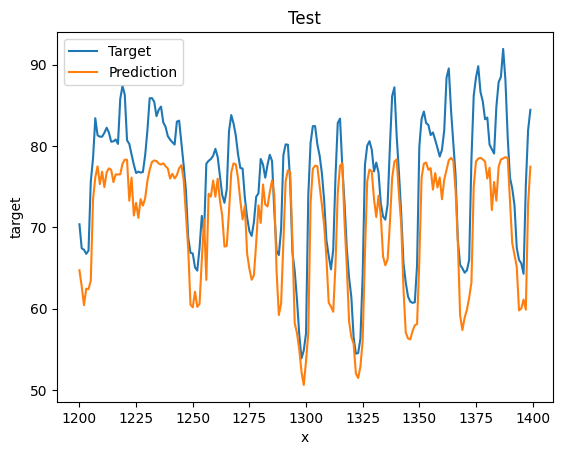

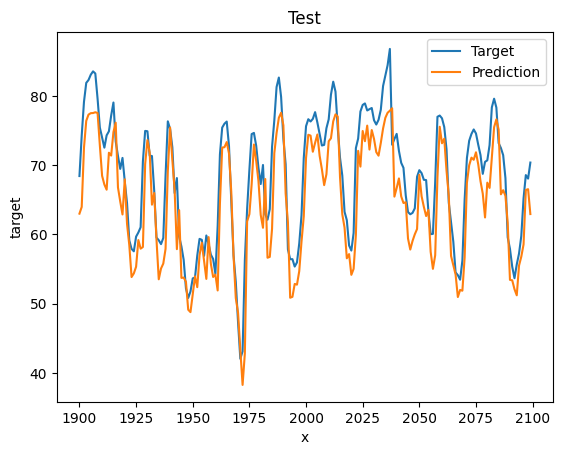

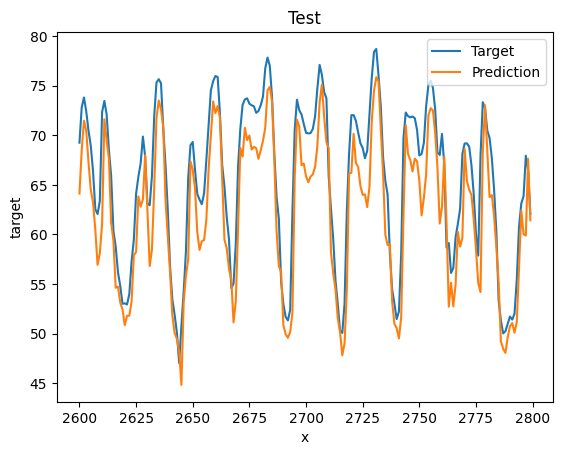

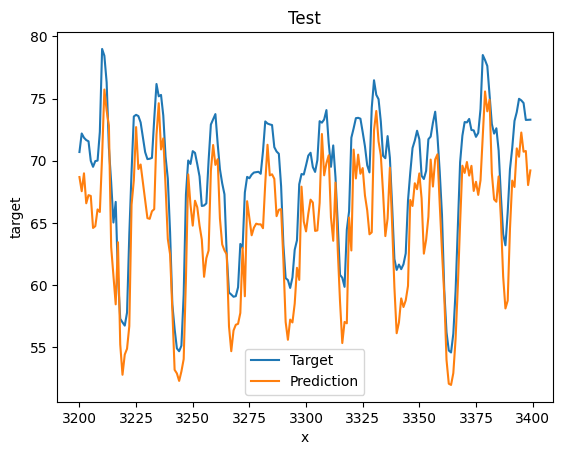

In [6]:
plot_prediction_lstm()

Out of the three models the LSTM is the best performing one. However, we notice that the model struggles predicting values above 80 (first picture). It is also clear that the model is underestimating the target variable in the test set. This is likely due to overfitting the training set. It would have been interesting to try with different combinations of features to improve model (as a reminder, this model is trained only on the price in the last 24h).